In [20]:
import os
from pm4py.objects.log.importer.xes import factory as xes_import_factory

parameters = {"timestamp_sort": True}

log = xes_import_factory.apply("../data/prlog_lifecycle.xes", variant="nonstandard", parameters=parameters)

In [21]:
from pm4py.algo.discovery.alpha import factory as alpha_miner

net, initial_marking, final_marking = alpha_miner.apply(log)

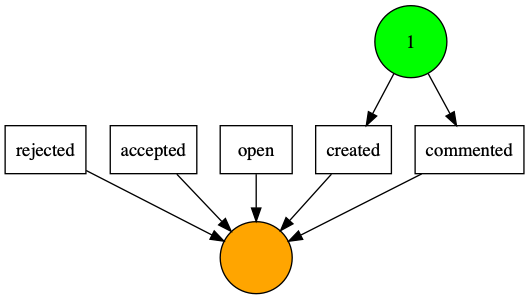

In [22]:
from pm4py.visualization.petrinet import factory as pn_vis_factory

gviz = pn_vis_factory.apply(net, initial_marking, final_marking)
pn_vis_factory.view(gviz)

The place colored green is the source place and belongs to the initial marking. In the initial marking, a token is assigned to that place (indicated by the number 1 on the place). The place colored orange is the sink place and belongs to the final marking. We see that transitions here correspond to activities in the log. Models extracted by the Alpha Miner often have deadlock problems, so it is not sure that each trace is replayable on this model.

In [23]:
from pm4py.algo.discovery.heuristics import factory as heuristics_miner
heu_net = heuristics_miner.apply_heu(log, parameters={"dependency_thresh": 0.99})

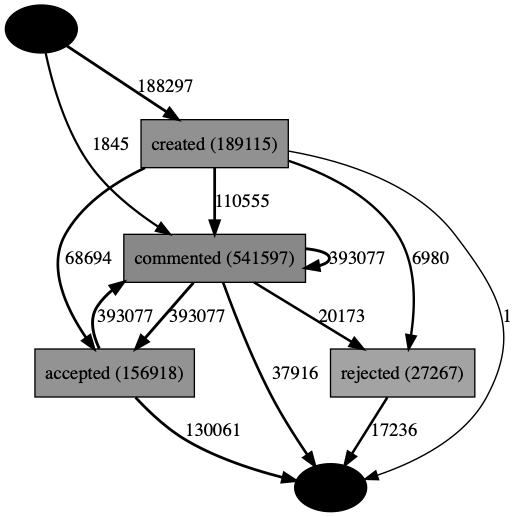

In [24]:
from pm4py.visualization.heuristics_net import factory as hn_vis_factory
gviz = hn_vis_factory.apply(heu_net)
hn_vis_factory.view(gviz)

In [25]:
from pm4py.algo.discovery.heuristics import factory as heuristics_miner
net, im, fm = heuristics_miner.apply(log, parameters={"dependency_thresh": 0.99})

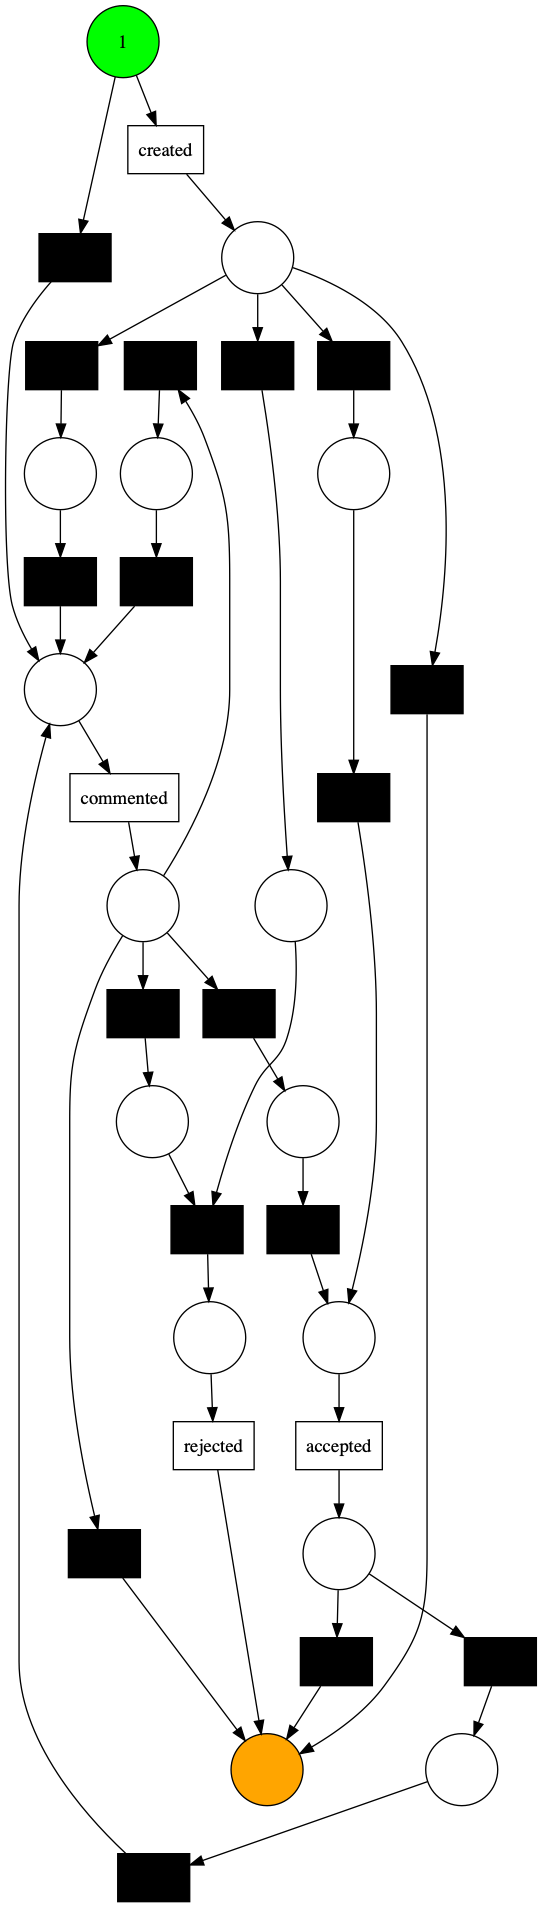

In [26]:
from pm4py.visualization.petrinet import factory as pn_vis_factory
gviz = pn_vis_factory.apply(net, im, fm)
pn_vis_factory.view(gviz)